Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 04: Segmentation and Color

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 2, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [2 Bonus Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

YOUR ANSWER HERE

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

YOUR ANSWER HERE

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

YOUR ANSWER HERE

In [1]:
# YOUR CODE HERE

## Assignment 1: Painting with a webcam using color detection [2 points]


### Introducing cvloop

From now on we will try to make the exercises a bit more interactive and enable you to see the algorithms in live action. For that purpose we use the package `cvloop`. To install it first source your cv environment and then run the follwing cell

In [2]:
!pip install cvloop

Check that it works by executing the cell below:

<IPython.core.display.Javascript object>


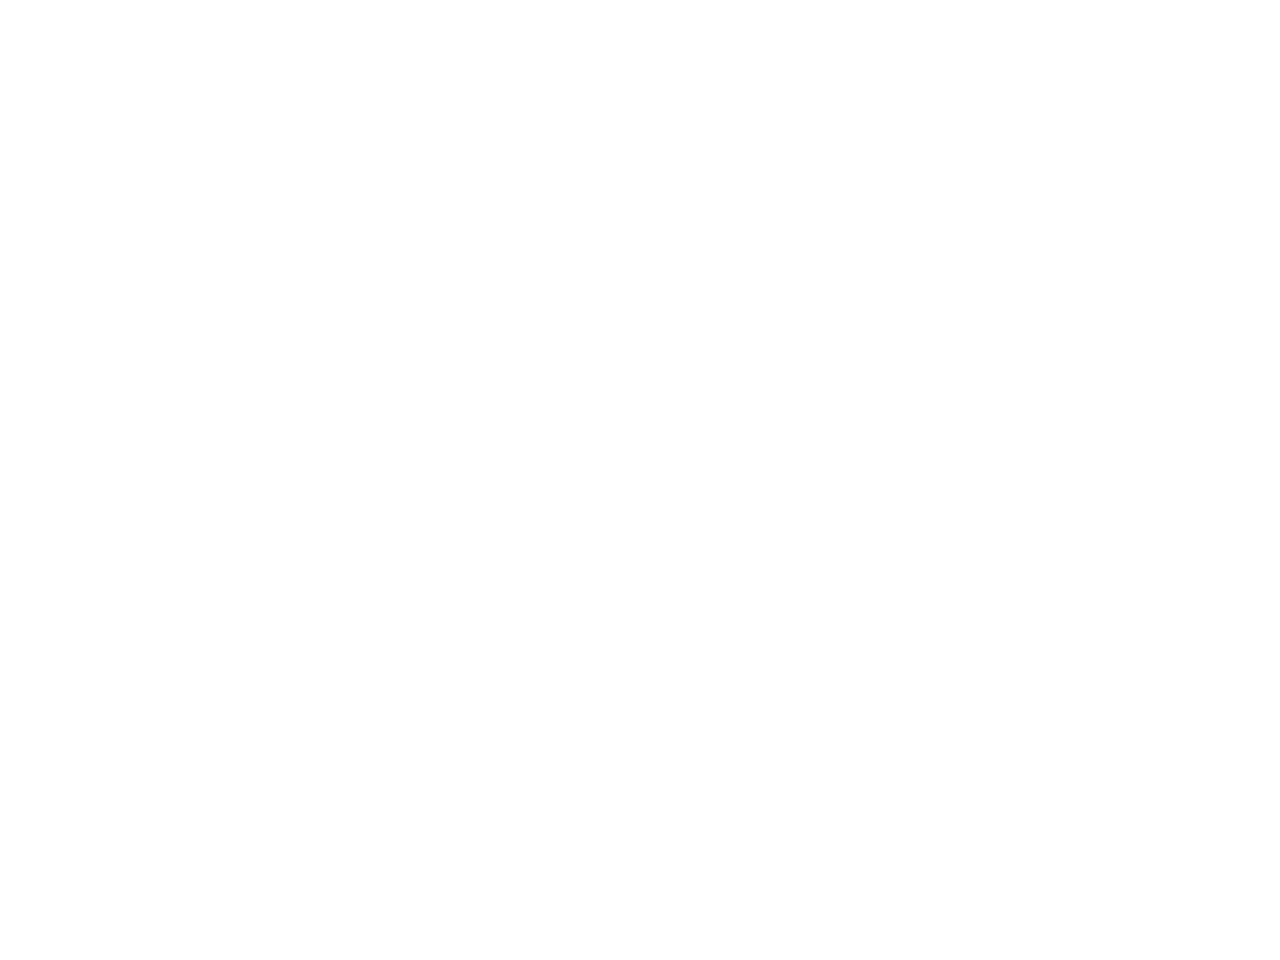

In [1]:
from cvloop import cvloop
cvl = cvloop(function=lambda frame: 255 - frame, side_by_side=True)

### a)
In this task we will track a small colored object (like the cap of a pen) in front of a neutral background of a different color. We will use the location of the object to paint on a virtual canvas. For that you have to implement the following tasks in the `draw_func` function:

* Convert the image `img` given to the `draw_func` into HSV color space. You may use the OpenCV function `cvtColor`. Note: In OpenCV BGR and not RGB is the standard color space.
* Measure the color of your object. You may return the converted image and interactively measure the color with your mouse. Define your measured hue value in a constant
* Discard all channel except the hue channel. 
* Find the location with the most similar hue to the measured hue of your object. You may cast your `uint8` image to `int16`
to allow negative values
* Paint for example a circle at this position in `img_draw`.

Use OpenCV functions to find minima, draw circles, etc.

In [2]:
%matplotlib inline
from cvloop import cvloop
import cv2
import numpy as np

radius = 5
color = (255,255,255)
# Adapt this hue value to the hue of your object
h = 0
img_draw = np.zeros((480,640,3), np.uint8) 

def draw_func(img):
    
    """
    Draw circle on img_draw at detected object location
    
    Args:
        img          the BGR input image (uint8)

    Returns:
        img_draw     img with circle drawn at postion of object
    """
    
    # YOUR CODE HERE
    
    hsv_img  = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    diff_img = cv2.medianBlur(hsv_img[:,:,0] - h,5)
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hue_img)
    
    cv2.circle(diff_img, minLoc, 80, (255,0,0),20)
    
    return diff_img

In [5]:
# Test with single image and without cvloop. (cvloop supresses errors in the called function)
%matplotlib inline
import imageio
import matplotlib.pyplot as plt

reader = imageio.get_reader('<video0>')
img = reader.get_next_data()

plt.imshow(draw_func(img))

reader.close()



IndexError: No video4linux camera at <video0>.

FFMPEG STDERR OUTPUT:

ffmpeg version 4.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with Apple LLVM version 6.1.0 (clang-602.0.53) (based on LLVM 3.6.0svn)
  configuration: --prefix=/Users/Henning/anaconda --disable-doc --disable-openssl --enable-shared --enable-static --extra-cflags='-Wall -g -m64 -pipe -O3 -march=x86-64 -fPIC' --extra-cxxflags='-Wall -g -m64 -pipe -O3 -march=x86-64 -fPIC' --extra-libs='-lpthread -lm -lz' --enable-zlib --enable-pic --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --enable-libfreetype --enable-gnutls --enable-libx264 --enable-libopenh264
  libavutil      56. 22.100 / 56. 22.100
  libavcodec     58. 35.100 / 58. 35.100
  libavformat    58. 20.100 / 58. 20.100
  libavdevice    58.  5.100 / 58.  5.100
  libavfilter     7. 40.101 /  7. 40.101
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  3.100 /  5.  3.100
  libswresample   3.  3.100 /  3.  3.100
  libpostproc    55.  3.100 / 55.  3.100
[avfoundation @ 0x7fd8ba802e00] Selected framerate (29.970030) is not supported by the device
[avfoundation @ 0x7fd8ba802e00] Supported modes:
[avfoundation @ 0x7fd8ba802e00]   1280x720@[1.000000 30.000000]fps
    Last message repeated 2 times
[avfoundation @ 0x7fd8ba802e00]   640x480@[1.000000 30.000000]fps
    Last message repeated 2 times
[avfoundation @ 0x7fd8ba802e00]   320x240@[1.000000 30.000000]fps
    Last message repeated 2 times
0: Input/output error


<IPython.core.display.Javascript object>


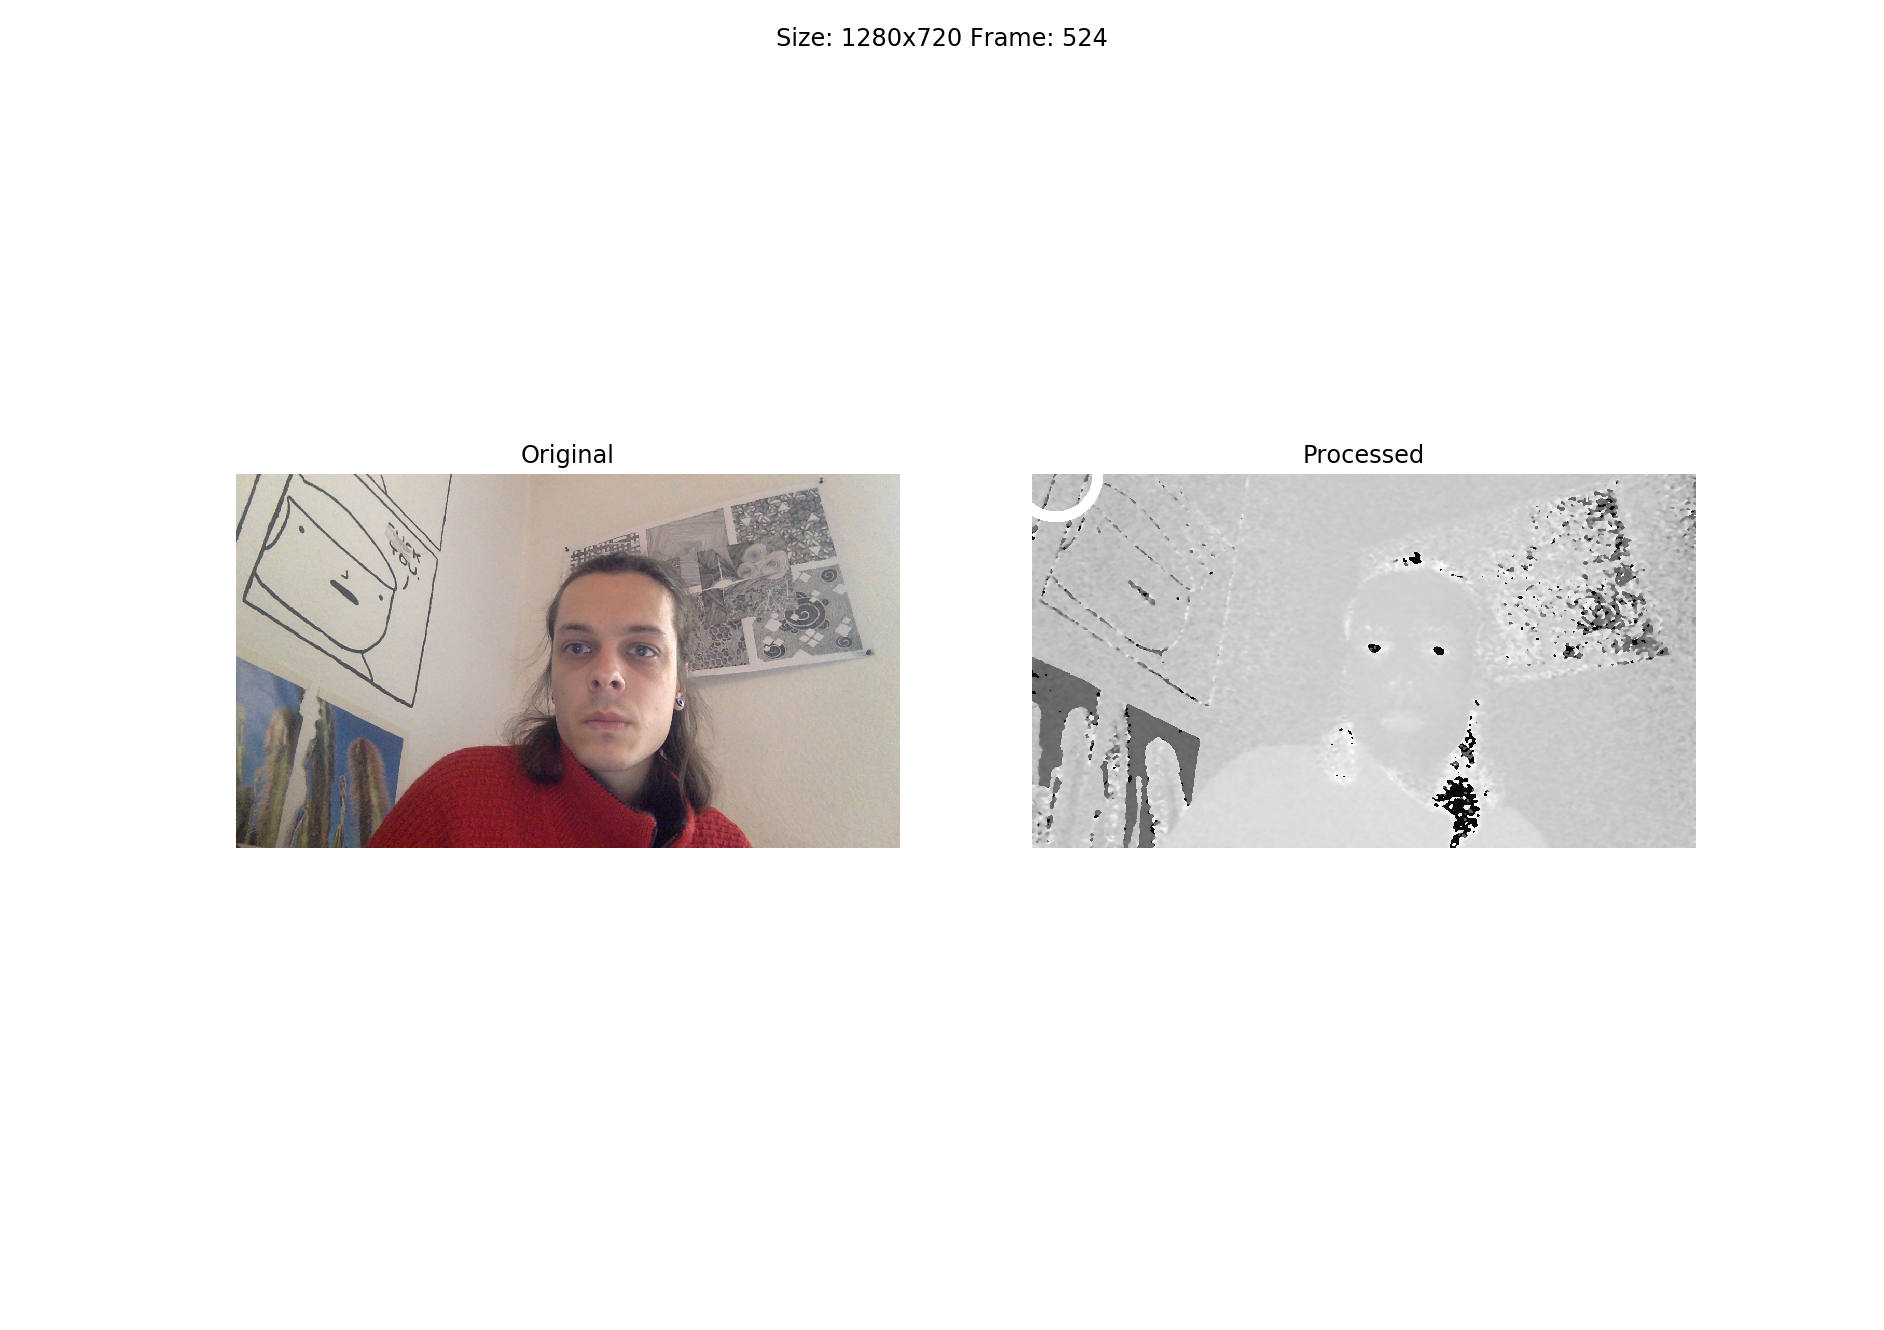

In [3]:
# Now use cvloop to run the algorithm live on webcam data     
cvl = cvloop(function=draw_func, side_by_side=True)

## Assignment 2: Histogram-based segmentation [5 Points]

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

Histogram-based segmentation aims to partition die pixels of an image into two classes by selecting a threshold value based on the histogram. In the case of an image with many near-white and many near-black pixels the histogram contains a bimodal distribution that can be used to compute a useful threshold.

HBS is fast and easy to implement
Due to its simplicity it is not robust and already fails if the lightning conditions are suboptimal

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scikit-image and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

#### Bimodal threshold (-minimum)
The histogram is smoothed as long as there are more than two peaks. If two peaks remain they are used to compute the threshold.

#### Otsu's Method
The histogram is split by the search of a threshold that minimises the intra class variance. Meaning that for all possible thresholds the variance of values of the resulting classes is computed and the one is chosen for which it is minimal.

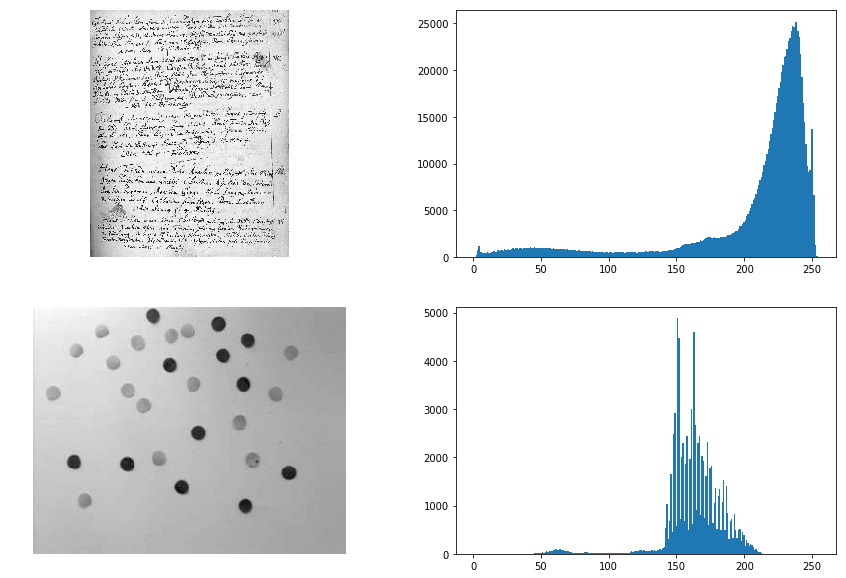

In [4]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt

# plt.imread reads pngs as float and jpg as uint8
img1 = plt.imread('images/schrift.png')*255
img2 = plt.imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

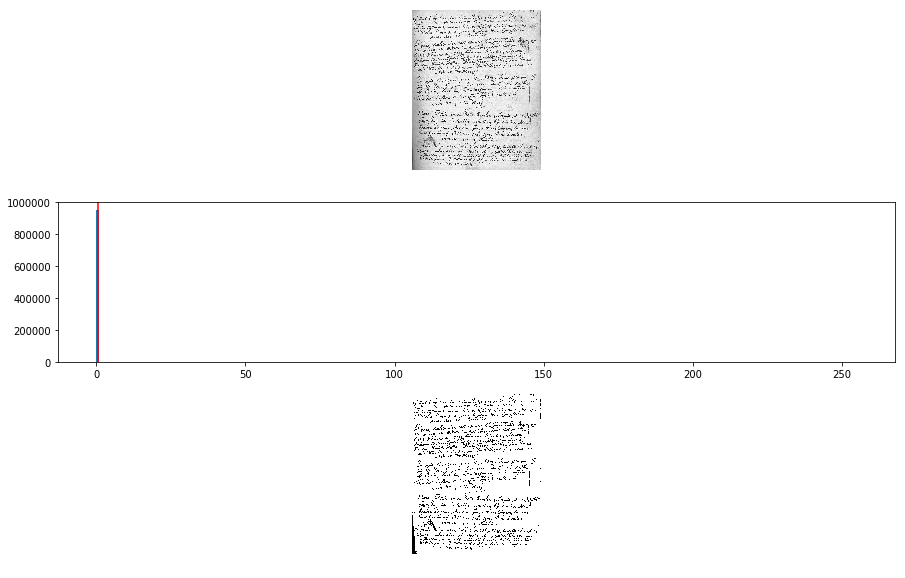

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

from skimage.filters import threshold_minimum, threshold_otsu

img = plt.imread('images/schrift.png') # 'schrift.png' or 'pebbles.jpg'

thresh = threshold_otsu(img)
segments = img>thresh

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(img)
plt.subplot(3,1,2); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh, color='r')
plt.subplot(3,1,3); plt.axis('off'); plt.imshow(segments)
plt.show()

### c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`. You may use filter functions from scikit-image for this exercise.

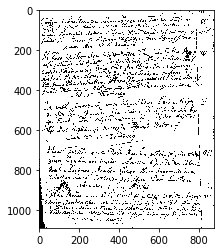

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.filters import threshold_minimum, threshold_otsu

img = plt.imread('images/schrift.png')
#img = plt.imread('images/pebbles.png')

img *= 1.0/np.maximum(1.0,ndi.maximum_filter(img,5))

thresh = threshold_otsu(img)
segments = img>thresh

plt.imshow(segments)

## Assignment 3: Pyramid representation [3 Points]

**a)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

A gaussian pyramid is used to represent an image on different scales. It works by reducing the image resolution successively such that a pixel in the next level is computed from a weighted average of the neighbouring pixels of the previous level (reduction operation). Before each reduction the image is low pass filtered by gauss/binomial filter. This has to be done to avoid noise dominate the procedure.

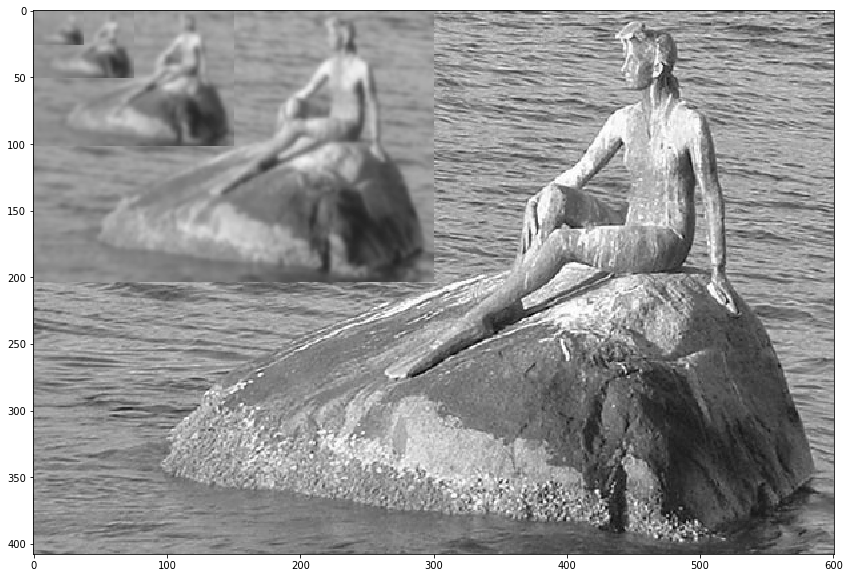

In [85]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def representation(Pyramid):
    MainImage = Pyramid[0].copy()
    for simg in Pyramid[1:]:
        MainImage[:simg.shape[0],:simg.shape[1]] = simg
    return MainImage

img = plt.imread('images/mermaid.png')
Pyramid = []
steps  = 4
for i in range(steps):
    Pyramid.append(img.copy())
    img = ndimage.filters.gaussian_filter(img,3)[::2,::2]
Pyramid.append(img.copy())            

pyramid_image = representation(Pyramid)

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**b)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

The expand operation can be viewed as a reverse gaussian pyramid. It works by interpolating values to achieve higher resolutions. The reduce operation can not be inverted because information gets obviously lost during the reduction.

(102, 151)


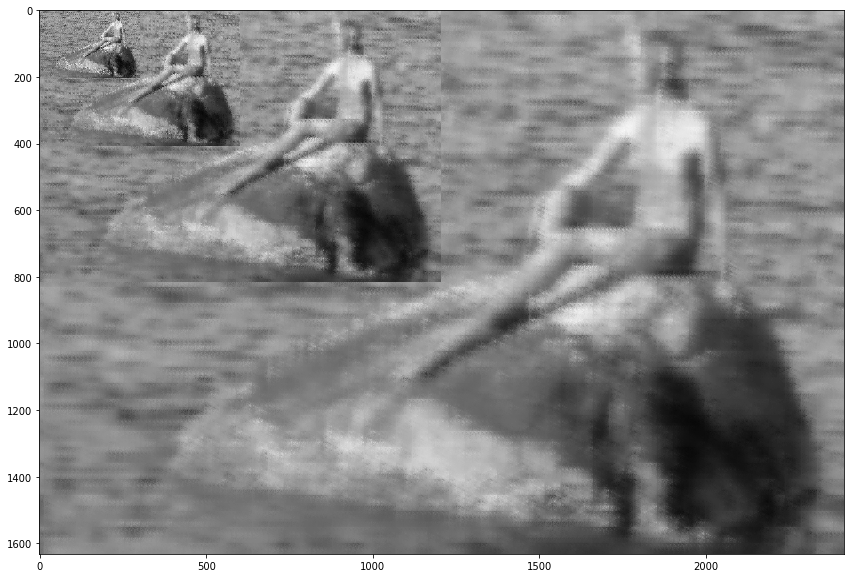

In [153]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


def representation(Pyramid):
    MainImage = Pyramid[0].copy()
    for simg in Pyramid[1:]:
        MainImage[:simg.shape[0],:simg.shape[1]] = simg
    return MainImage

kernel_even = np.array([[1,0,6,0,1]])/8
kernel_odd  = np.array([[4,0,4]])/8


img = plt.imread('images/mermaid.png')
steps = 4
img = img[::steps,::steps]
print(img.shape)

Pyramid = []
for i in range(steps):
    #upsampling
    nimg = np.zeros((img.shape[0]*2,img.shape[1]*2))
    
    nimg[::2,1::2]  = ndimage.filters.convolve(img,kernel_even)
    nimg[1::2,1::2] = ndimage.filters.convolve(img,kernel_odd)
    
    nimg[::2,::2]  = ndimage.filters.convolve(nimg[::2,1::2].T,kernel_even).T
    nimg[1::2,::2]  = ndimage.filters.convolve(nimg[::2,1::2].T,kernel_odd).T
       
    img = nimg.copy()
    Pyramid.append(img.copy())


pyramid_image = representation(Pyramid[::-1])
plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()


## Assignment 4: Texture Segmentation [5 Points]

**a)** What is texture? Try to define it in your own words. Can there be a standard definition? What problems do you expect for texture based segmentation? 

Texture is the visual as well as structural property of a surface or part of a coherent structure.
Texture has no standard definition because it is subjective and often problem specific.

Texture often correlates with segmentation regions. If texture on the other hand is the only basis for the segmentation the method will fail in many cases as some objects can have different textures.

**b)** What is a co-occurence matrix? How can it be used to characterize texture?

A co-occurence matrix yields the co-occurence of value intensities of pixel pairs of a specific offset (e.g.) neighbouring pixels.
The matrix holds statistical information of an image patch and can be used as a texture feature.


**c)** Implement a function to compute the co-occurence matrix of an image (patch). Apply it and compare your results to (CV-07 slide 54).

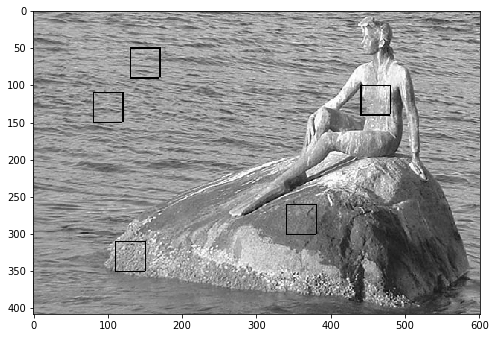

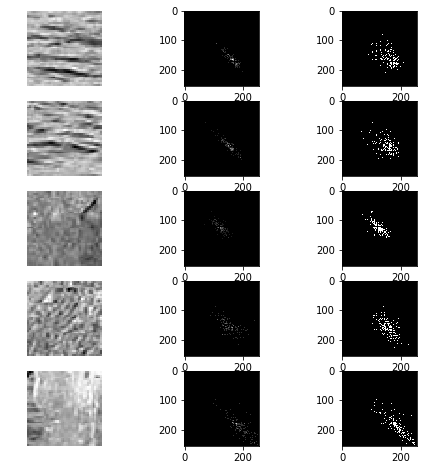

In [174]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio 
import numba

img = imageio.imread('images/mermaid.png')#, mode='L')

def get_patch(img, x, y, size=40):
    """
    Extract a rectangular patch from an image and mark it in the original image.
    """
    result = img[x:x+size,y:y+size].copy()
    img[x:x+size, [y,y+1,y+size,y+size+1]] = 0
    img[[x,x+1,x+size,x+size+1], y:y+size] = 0
    return result

patches = []
patches.append(get_patch(img, 50,130))
patches.append(get_patch(img, 110,80))
patches.append(get_patch(img, 260,340))
patches.append(get_patch(img, 310,110))
patches.append(get_patch(img, 100,440))

@numba.jit(nopython=True)
def cooccurrence2(img, dx=1, dy=1):
    """
    Compute a co-occurence matrix for the given image.
    
    Args:
        img          the grayscale image (uint8)
        dx,dy        the offset between the two reference points

    Returns:
        matrix       the co-occurence matrix
    """
    matrix = np.zeros((256, 256))
    dx = dx if dx!= 0 else -img.shape[0]
    dy = dy if dy!= 0 else -img.shape[1]
    
    for hidx,_ in np.ndenumerate(matrix):
        g1,g2 = hidx
        matrix[g1,g2] = 1.0/(max(1,img.shape[0]**2)) * np.sum(np.logical_and((img[:-dx,:-dy]==g1),(img[dx:,dy:]==g2)))
            
    return matrix


plt.figure(figsize=(8, 8))
plt.gray()
plt.imshow(img)
plt.show()

plt.figure(figsize=(8, 8))
i = 0
for p in patches:
    plt.subplot(len(patches),3,i+1); plt.axis('off'); plt.imshow(p)
    # For visualization one may apply some extra me, e.g., logarithmization or binarization
    plt.subplot(len(patches),3,i+2); plt.imshow(np.log(1 + cooccurrence2(p, 0, 1)), interpolation='none')
    plt.subplot(len(patches),3,i+3); plt.imshow(cooccurrence2(p,1,0)>0, interpolation='none')
    i += 3
plt.show()

## Assignment 5: Region merging [5 Points]

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

----------------------------------------------------------------------------------------------------
####################################################################################################

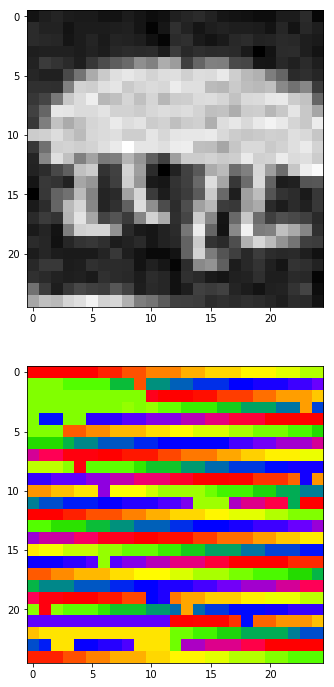

In [269]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio
import warnings
warnings.filterwarnings('ignore')

img = plt.imread('/Users/Henning/Documents/Studium/WS1819/CV/sheet04/images/segments.png')#, pilmode='L')
img = (img[:25,:25]*255).astype(np.uint8)

def Homogenity(x,y,dx,dy):
    if max(abs(MinMax[x,y,1]-MinMax[dx,dy,0]),abs(MinMax[dx,dy,1]-MinMax[x,y,0])) < 50:
        return True
    else:
        return False

Labels  = np.arange(img.size).reshape(img.shape)   
MinMax  = np.repeat(img.copy()[:,:,np.newaxis],2,axis=2)

max_iter = 20000
print("-"*100)
for k in range(max_iter):
    if k%(max_iter//100)==0:
        print("#",end="")
    merges = 0
    for idx,_ in np.ndenumerate(Labels[:-1,:-1]):
        x,y = idx
        
        if (Labels[x,y] != Labels[x,y+1]) and Homogenity(x,y,x,y+1):
            dx,dy = x,y+1
            Labels[dx,dy]   = 1*Labels[x,y]
            MinMax[dx,dy,0] = min(MinMax[x,y,0],MinMax[dy,dy,0])
            MinMax[dx,dy,1] = max(MinMax[x,y,1],MinMax[dx,dy,1])
            merges += 1
            #break
        if (Labels[x,y] != Labels[x+1,y]) and Homogenity(x,y,x+1,y):
            dx,dy = x+1,y
            Labels[dx,dy]   = 1*Labels[x,y]
            MinMax[dx,dy,0] = min(MinMax[x,y,0],MinMax[dy,dy,0])
            MinMax[dx,dy,1] = max(MinMax[x,y,1],MinMax[dx,dy,1])
            merges += 1
            #break

    if merges == 0:
        break
    

label = Labels

plt.figure(figsize=(12, 12))
plt.gray()
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(label, cmap='prism')
plt.show()


warnings.filterwarnings('ignore')
